# Stress Predictor 

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

## Reading CSV and Understanding Data

In [6]:
df = pd.read_csv('academic Stress level - maintainance 1.csv')

In [7]:
df.rename(columns={'Your Academic Stage': 'Academic Stage', 'Rate your academic stress index ': 'Academic stress index'}, inplace=True)

In [8]:
df.head(3)

,Timestamp,Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Academic stress index
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4


In [9]:
df.describe()

,Peer pressure,Academic pressure from your home,What would you rate the academic competition in your student life,Academic stress index
count,140.000000,140.000000,140.000000,140.000000
mean,3.071429,3.178571,3.492857,3.721429
std,1.083844,1.276618,1.028349,1.032339
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000,3.000000
50%,3.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Timestamp                                                            140 non-null    object
 1   Academic Stage                                                       140 non-null    object
 2   Peer pressure                                                        140 non-null    int64 
 3   Academic pressure from your home                                     140 non-null    int64 
 4   Study Environment                                                    139 non-null    object
 5   What coping strategy you use as a student?                           140 non-null    object
 6   Do you have any bad habits like smoking, drinking on a daily basis?  140 non-null    object
 7   What would you rat

## Finding and dealing with Null Values

In [11]:
df.isnull().sum()

Timestamp                                                              0
Academic Stage                                                         0
Peer pressure                                                          0
Academic pressure from your home                                       0
Study Environment                                                      1
What coping strategy you use as a student?                             0
Do you have any bad habits like smoking, drinking on a daily basis?    0
What would you rate the academic  competition in your student life     0
Academic stress index                                                  0
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df.isnull().sum()

Timestamp                                                              0
Academic Stage                                                         0
Peer pressure                                                          0
Academic pressure from your home                                       0
Study Environment                                                      0
What coping strategy you use as a student?                             0
Do you have any bad habits like smoking, drinking on a daily basis?    0
What would you rate the academic  competition in your student life     0
Academic stress index                                                  0
dtype: int64

In [14]:
df = df.drop(['Timestamp', 'What coping strategy you use as a student?'], axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, 0 to 139
Data columns (total 7 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Academic Stage                                                       139 non-null    object
 1   Peer pressure                                                        139 non-null    int64 
 2   Academic pressure from your home                                     139 non-null    int64 
 3   Study Environment                                                    139 non-null    object
 4   Do you have any bad habits like smoking, drinking on a daily basis?  139 non-null    object
 5   What would you rate the academic  competition in your student life   139 non-null    int64 
 6   Academic stress index                                                139 non-null    int64 
dtypes: int64(4), object(3)


In [16]:
df.head(2)

,Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Academic stress index
0,undergraduate,4,5,Noisy,No,3,5
1,undergraduate,3,4,Peaceful,No,3,3


## Encoding catergorical feature values 

In [17]:
from sklearn.preprocessing import OrdinalEncoder

In [18]:
#Ordinal Encoder for Academic Stage, Maybe Bad Habits

In [19]:
unique_academic_stages = df['Academic Stage'].unique()
print(unique_academic_stages)

['undergraduate' 'high school' 'post-graduate']


In [20]:
#unique_study_envs = df['Study Environment'].unique()
#print(unique_study_envs)

In [21]:
encoder_for_academic = OrdinalEncoder(categories=[['high school', 'undergraduate', 'post-graduate']])

In [22]:
df['Academic Stage'] = encoder_for_academic.fit_transform(df[['Academic Stage']]).astype(int).ravel()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, 0 to 139
Data columns (total 7 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Academic Stage                                                       139 non-null    int64 
 1   Peer pressure                                                        139 non-null    int64 
 2   Academic pressure from your home                                     139 non-null    int64 
 3   Study Environment                                                    139 non-null    object
 4   Do you have any bad habits like smoking, drinking on a daily basis?  139 non-null    object
 5   What would you rate the academic  competition in your student life   139 non-null    int64 
 6   Academic stress index                                                139 non-null    int64 
dtypes: int64(5), object(2)


In [24]:
df.head(5)

,Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Academic stress index
0,1,4,5,Noisy,No,3,5
1,1,3,4,Peaceful,No,3,3
2,1,1,1,Peaceful,No,2,4
3,1,3,2,Peaceful,No,4,3
4,1,3,3,Peaceful,No,4,5


In [25]:
print(df['Academic Stage'].unique())

[1 0 2]


### Encoding Study Environment

In [26]:
print(df['Study Environment'].unique())

['Noisy' 'Peaceful' 'disrupted']


In [27]:
encoder_for_studyenv = OrdinalEncoder(categories=[['Peaceful', 'disrupted', 'Noisy']])

In [28]:
df['Study Environment'] = encoder_for_studyenv.fit_transform(df[['Study Environment']]).astype(int).ravel()

In [29]:
df.head(5)

,Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Academic stress index
0,1,4,5,2,No,3,5
1,1,3,4,0,No,3,3
2,1,1,1,0,No,2,4
3,1,3,2,0,No,4,3
4,1,3,3,0,No,4,5


### Encoding Bad Habits

In [30]:
print(df['Do you have any bad habits like smoking, drinking on a daily basis?'].unique())

['No' 'prefer not to say' 'Yes']


In [31]:
df['Bad_Habits_Encoded'] = df['Do you have any bad habits like smoking, drinking on a daily basis?'].str.strip().str.lower().map({
    'yes': 1,
    'no': 0,
    'prefer not to say': -1  
})

In [32]:
df.head(5)

,Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Academic stress index,Bad_Habits_Encoded
0,1,4,5,2,No,3,5,0
1,1,3,4,0,No,3,3,0
2,1,1,1,0,No,2,4,0
3,1,3,2,0,No,4,3,0
4,1,3,3,0,No,4,5,0


In [33]:
df.columns = df.columns.str.strip()

## Model Development

In [34]:
print(df.columns.tolist())

['Academic Stage', 'Peer pressure', 'Academic pressure from your home', 'Study Environment', 'Do you have any bad habits like smoking, drinking on a daily basis?', 'What would you rate the academic  competition in your student life', 'Academic stress index', 'Bad_Habits_Encoded']


### Dropping unwanted columns 

In [35]:
df.drop(['Do you have any bad habits like smoking, drinking on a daily basis?', 'What would you rate the academic  competition in your student life'], axis=1, inplace=True)

In [36]:
df.head(5)

,Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,Academic stress index,Bad_Habits_Encoded
0,1,4,5,2,5,0
1,1,3,4,0,3,0
2,1,1,1,0,4,0
3,1,3,2,0,3,0
4,1,3,3,0,5,0


### Scaling and Spilting features in X and y

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
X = df.drop('Academic stress index', axis=1)
y = df['Academic stress index']

In [40]:
scaler = StandardScaler()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [42]:
X_train = scaler.fit_transform(X_train)

In [43]:
X_test = scaler.transform(X_test)

### Random Forest 

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
import seaborn as sns

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [47]:
from sklearn.metrics import accuracy_score

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
parm_dist = {
    'n_estimators': [25, 30,40, 50],
    'max_depth': [6, 7, 8,],
    'min_samples_split': [11, 13, 15],
    'min_samples_leaf': [8, 11, 12, 13],
    'bootstrap': [True]
}

In [82]:
grid_search = GridSearchCV(rf, parm_dist)
grid_search.fit(X, y)

# Print the optimal values for the hyperparameters
print(grid_search.best_params_)
print(grid_search.best_score_)

{'bootstrap': True, 'max_depth': 7, 'min_samples_leaf': 11, 'min_samples_split': 11, 'n_estimators': 30}
0.4537037037037037


In [85]:
rf = RandomForestClassifier(n_estimators=30,max_depth=7,min_samples_leaf=11,bootstrap=True)

In [87]:
rf.fit(X_train, y_train)

,n_estimators,30
,criterion,'gini'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,11
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [88]:
y_prediction_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_prediction_rf))

Random Forest Accuracy: 0.4642857142857143


<Axes: title={'center': 'Feature Importance towards Placement'}>

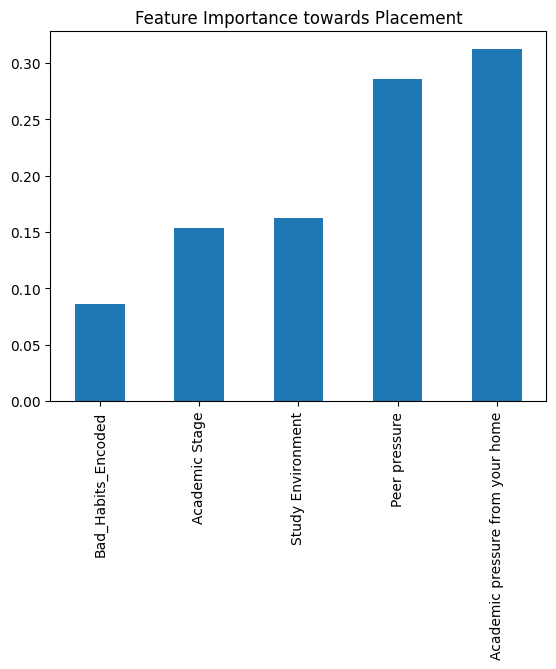

In [50]:
feat_imp = pd.Series(rf.feature_importances_, index=X.columns)
feat_imp.sort_values().plot(kind="bar", title="Feature Importance towards Placement")

### Logisitic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [52]:

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [53]:
y_pred = model.predict(X_test)

In [54]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5357142857142857


In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.33      0.14      0.20         7
           4       0.50      0.82      0.62        11
           5       0.71      0.71      0.71         7

    accuracy                           0.54        28
   macro avg       0.31      0.34      0.31        28
weighted avg       0.46      0.54      0.47        28



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

## Support Vector Machine (SVM)

In [56]:
from sklearn import svm

In [57]:
from sklearn.svm import SVC

In [58]:
ksvm = svm.SVC(kernel='rbf',
               gamma=2,
               C=1)

In [59]:
ksvm.fit(X_train, y_train)

,C,1
,kernel,'rbf'
,degree,3
,gamma,2
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [60]:
accuracy = ksvm.score(X_test, y_test)

In [61]:
print('Accuracy:', accuracy)

Accuracy: 0.42857142857142855
